Index(['Unnamed: 0', 'Job Title', 'Company Name', 'Industry', 'Location',
       'Employment Type', 'Salary Range', 'Job Description', 'Required Skills',
       'key_skills (copy the main ones from required)', 'Preffered Skills',
       'Experience Level', 'Experience Required', 'Language', 'Education',
       'Application Link', 'Posting Date', 'Deadline', 'Language of posting'],
      dtype='object')
[('data', 105), ('business', 56), ('support', 34), ('stakeholders', 28), ('analysis', 25), ('insights', 24), ('develop', 22), ('processes', 22), ('reporting', 21), ('development', 19), ('solutions', 19), ('requirements', 18), ('technical', 18), ('performance', 17), ('understand', 17), ('work', 17), ('bi', 16), ('maintain', 16), ('reports', 16), ('dashboards', 15)]
[('data analysis', 13), ('power bi', 13), ('data models', 7), ('understand data', 7), ('best practices', 6), ('business requirements', 6), ('data insights', 6), ('develop maintain', 6), ('actionable insights', 5), ('business st

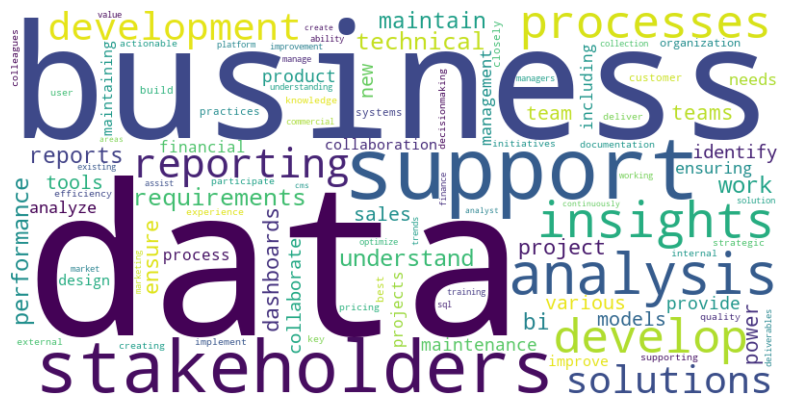

In [8]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Path to your CSV file
file_path = 'data_cleaning_script/cleaned_data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Check column names in the DataFrame
print(df.columns)

# Get the "Job Description" column and replace NaN with empty strings
df['Job Description'] = df['Job Description'].fillna('')

# Convert to a list
job_descriptions = df['Job Description'].tolist()

# Convert to DataFrame
df = pd.DataFrame(job_descriptions, columns=['description'])

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)  # Remove digits
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Clean the text
df['cleaned'] = df['description'].apply(preprocess_text)

# Convert ENGLISH_STOP_WORDS to a list for compatibility
stop_words = list(ENGLISH_STOP_WORDS)

# Tokenization and transformation to vectors with stopwords removal
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df['cleaned'])
word_freq = X.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_freq))

# Print the most frequent words
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
print(sorted_word_freq[:20])

# Bigram analysis
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)
X = vectorizer.fit_transform(df['cleaned'])
bigram_freq = X.sum(axis=0).A1
bigram_freq = dict(zip(vectorizer.get_feature_names_out(), bigram_freq))
sorted_bigram_freq = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)
print(sorted_bigram_freq[:10])

# Visualization - Word Cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

